# Popular Unsupervised Clustering Algorithms

## 📌데이터 불러오기/전처리

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

file_path = "/content/gdrive/My Drive/EuronData/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
#패키지 불러오기
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')
#print(os.listdir("../input"))

In [6]:
df = pd.read_csv(file_path + 'Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


결측치 없음!

In [8]:
#이름에 띄어쓰기 들어간 애들 이름 바꿔줌
df.rename(index=str, columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


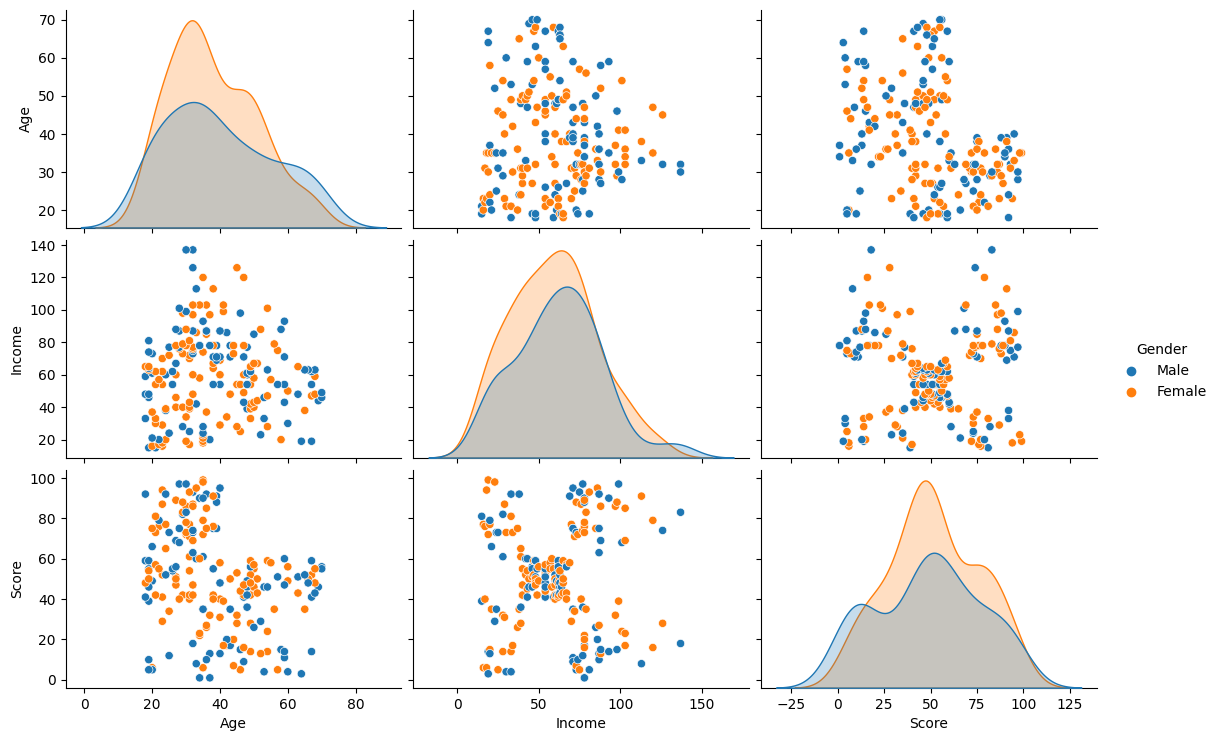

In [9]:
#Let's see our data in a detailed way with pairplot

X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

변수들사이의 상관관계를 보기 위해 산점도 생성  
Gender 변수가 크게 영향력이 없어보여서 앞으로 젠더는 빼고 진행

## 📌K-means

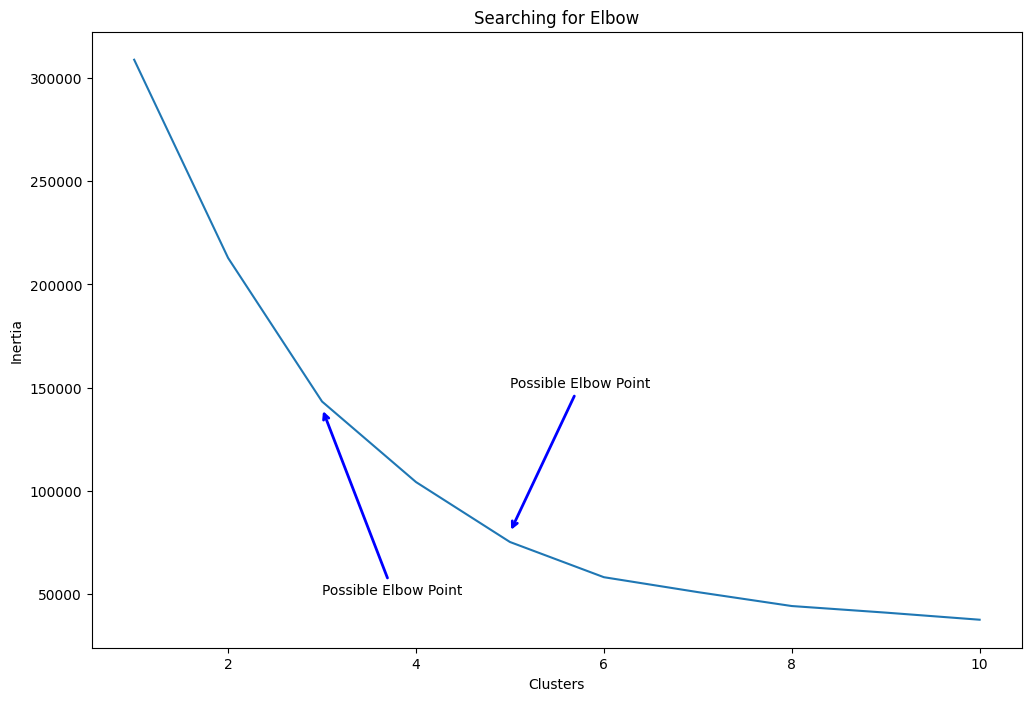

In [11]:
from sklearn.cluster import KMeans

clusters = []
#1부터 10 군집까지 inertia 저장
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
#엘보우차트 그리
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

#Annotate arrow
#설명선 긋기
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

3 또는 5에서 엘보우 포인트인것 같으니 해당 군집 수에 K-means를 적용해본다!

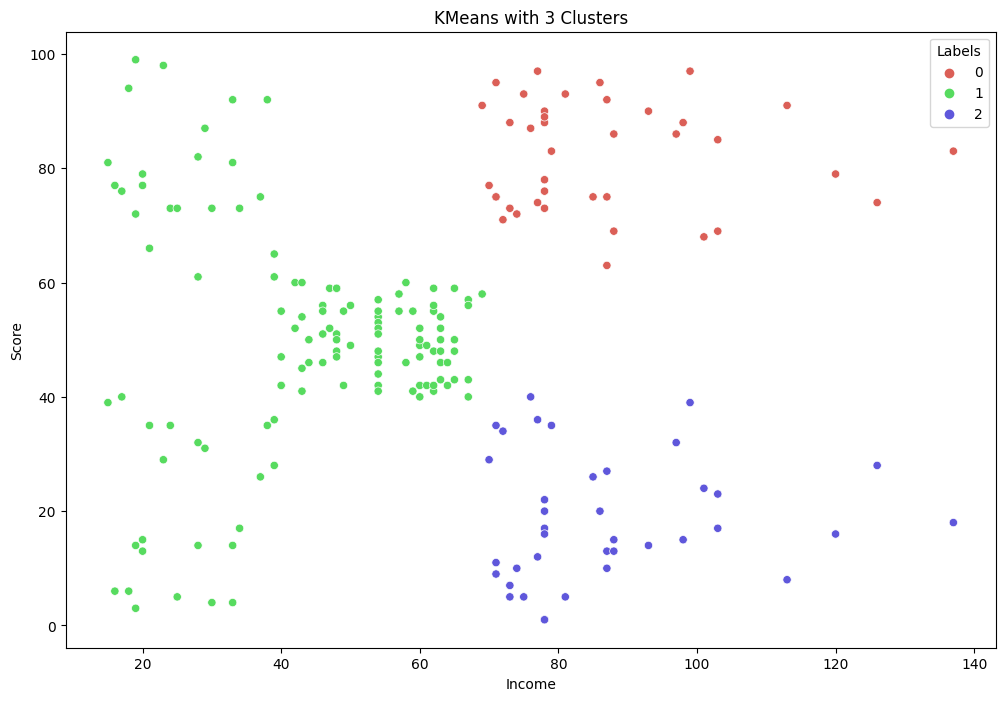

In [15]:
#3 cluster
#군집 3개로 진행
km3 = KMeans(n_clusters=3).fit(X)

#군집화 산점도 플랏
X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
#이유를 모르겠지만 아래 코드를 sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 3))로 쓰면 에러남
#그리고 x, y로 아예 지정해줘서 돌림! 노트북 코드 그대로 복붙해도 안되는디 뭐가 문젠진 모르겠지만 어쨌든 해결!⭐
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

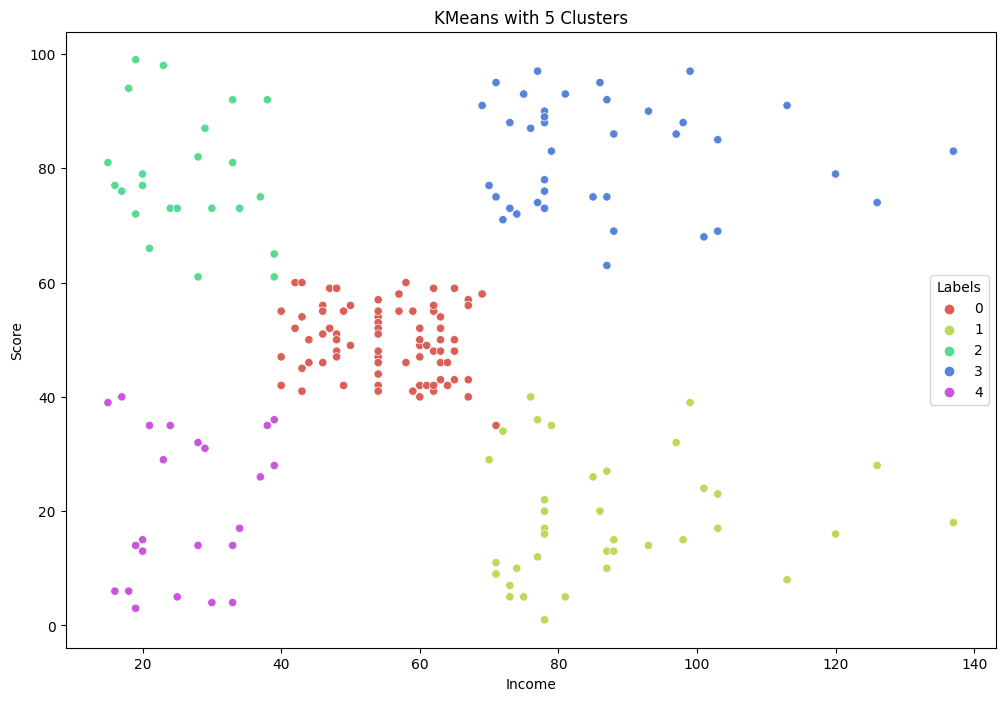

In [17]:
#Let's see with 5 Clusters
#군집 5개
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
#여기서도 위에서 났던 에러가 나서 위처럼 해결
#TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

5개 군집 모델이 더 군집화가 잘된 것처럼 보인다!  
그리고 이제 정확하게 내부적 내용을 알 순 없지만 라벨링을 다음과 같이 진행한다.  
- 라벨0 : 저소득, 저소비
- 라벨1 : 고소득, 고소비
- 라벨2 : 중간 소득, 중간 소비
- 라벨3: 고소득, 적은 소비
- 라벨4 : 저소득, 많은 소비

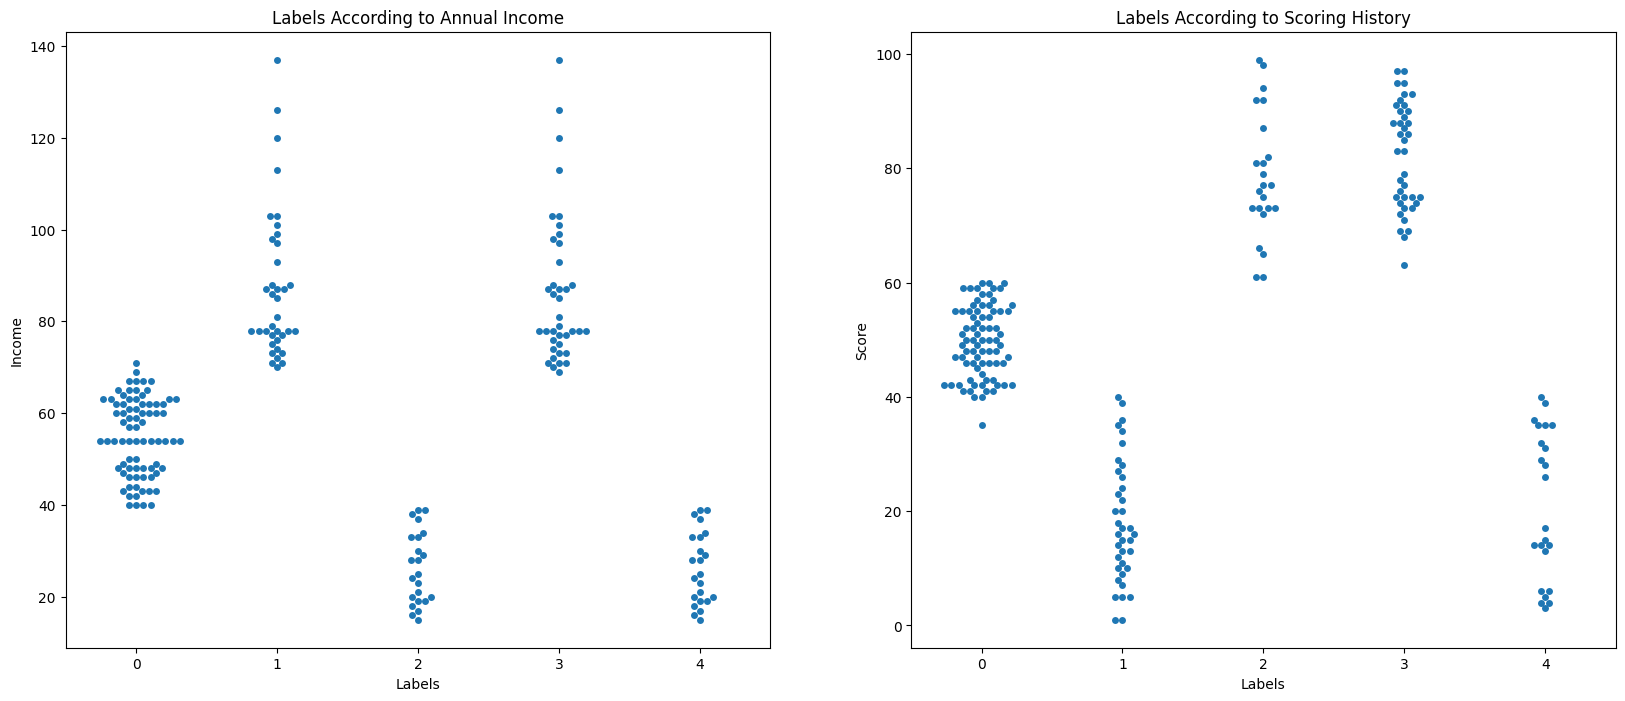

In [18]:
fig = plt.figure(figsize=(20,8))
#income에 따른 라벨링
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')
#Scoring history에 따른 라벨링
ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

## 📌AgglomerativeClustering

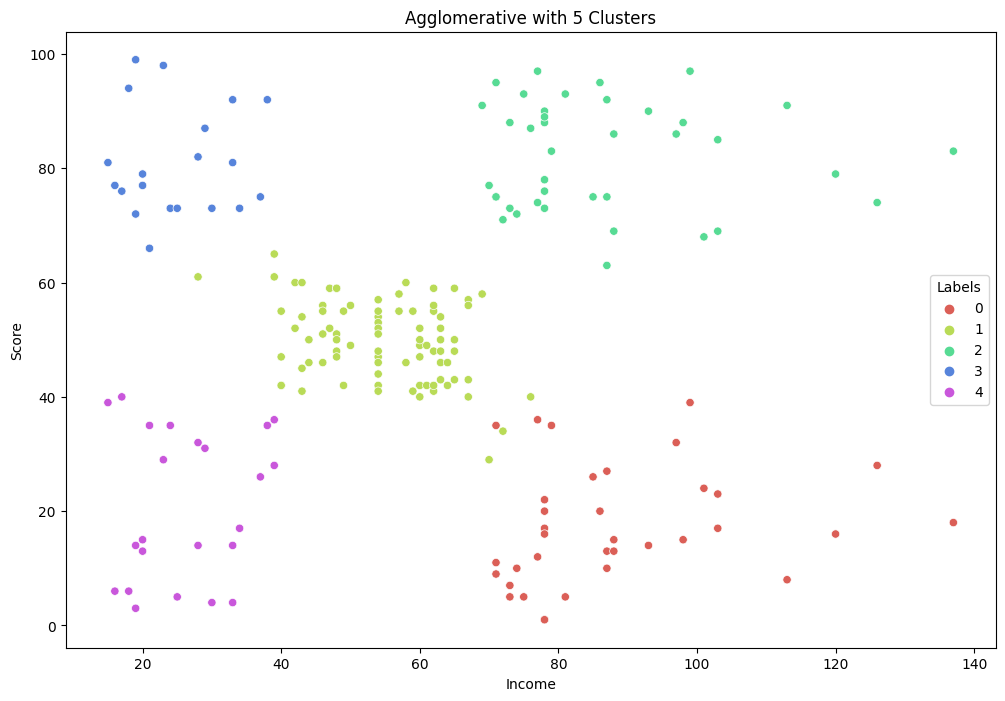

In [21]:
from sklearn.cluster import AgglomerativeClustering
#average 옵션, 즉 평균거리로 기준삼아 계층적군집 시행
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

In [22]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
#distance matrix 생성
dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


In [23]:
#최대 거리 기준 계층군집
Z = hierarchy.linkage(dist, 'complete')

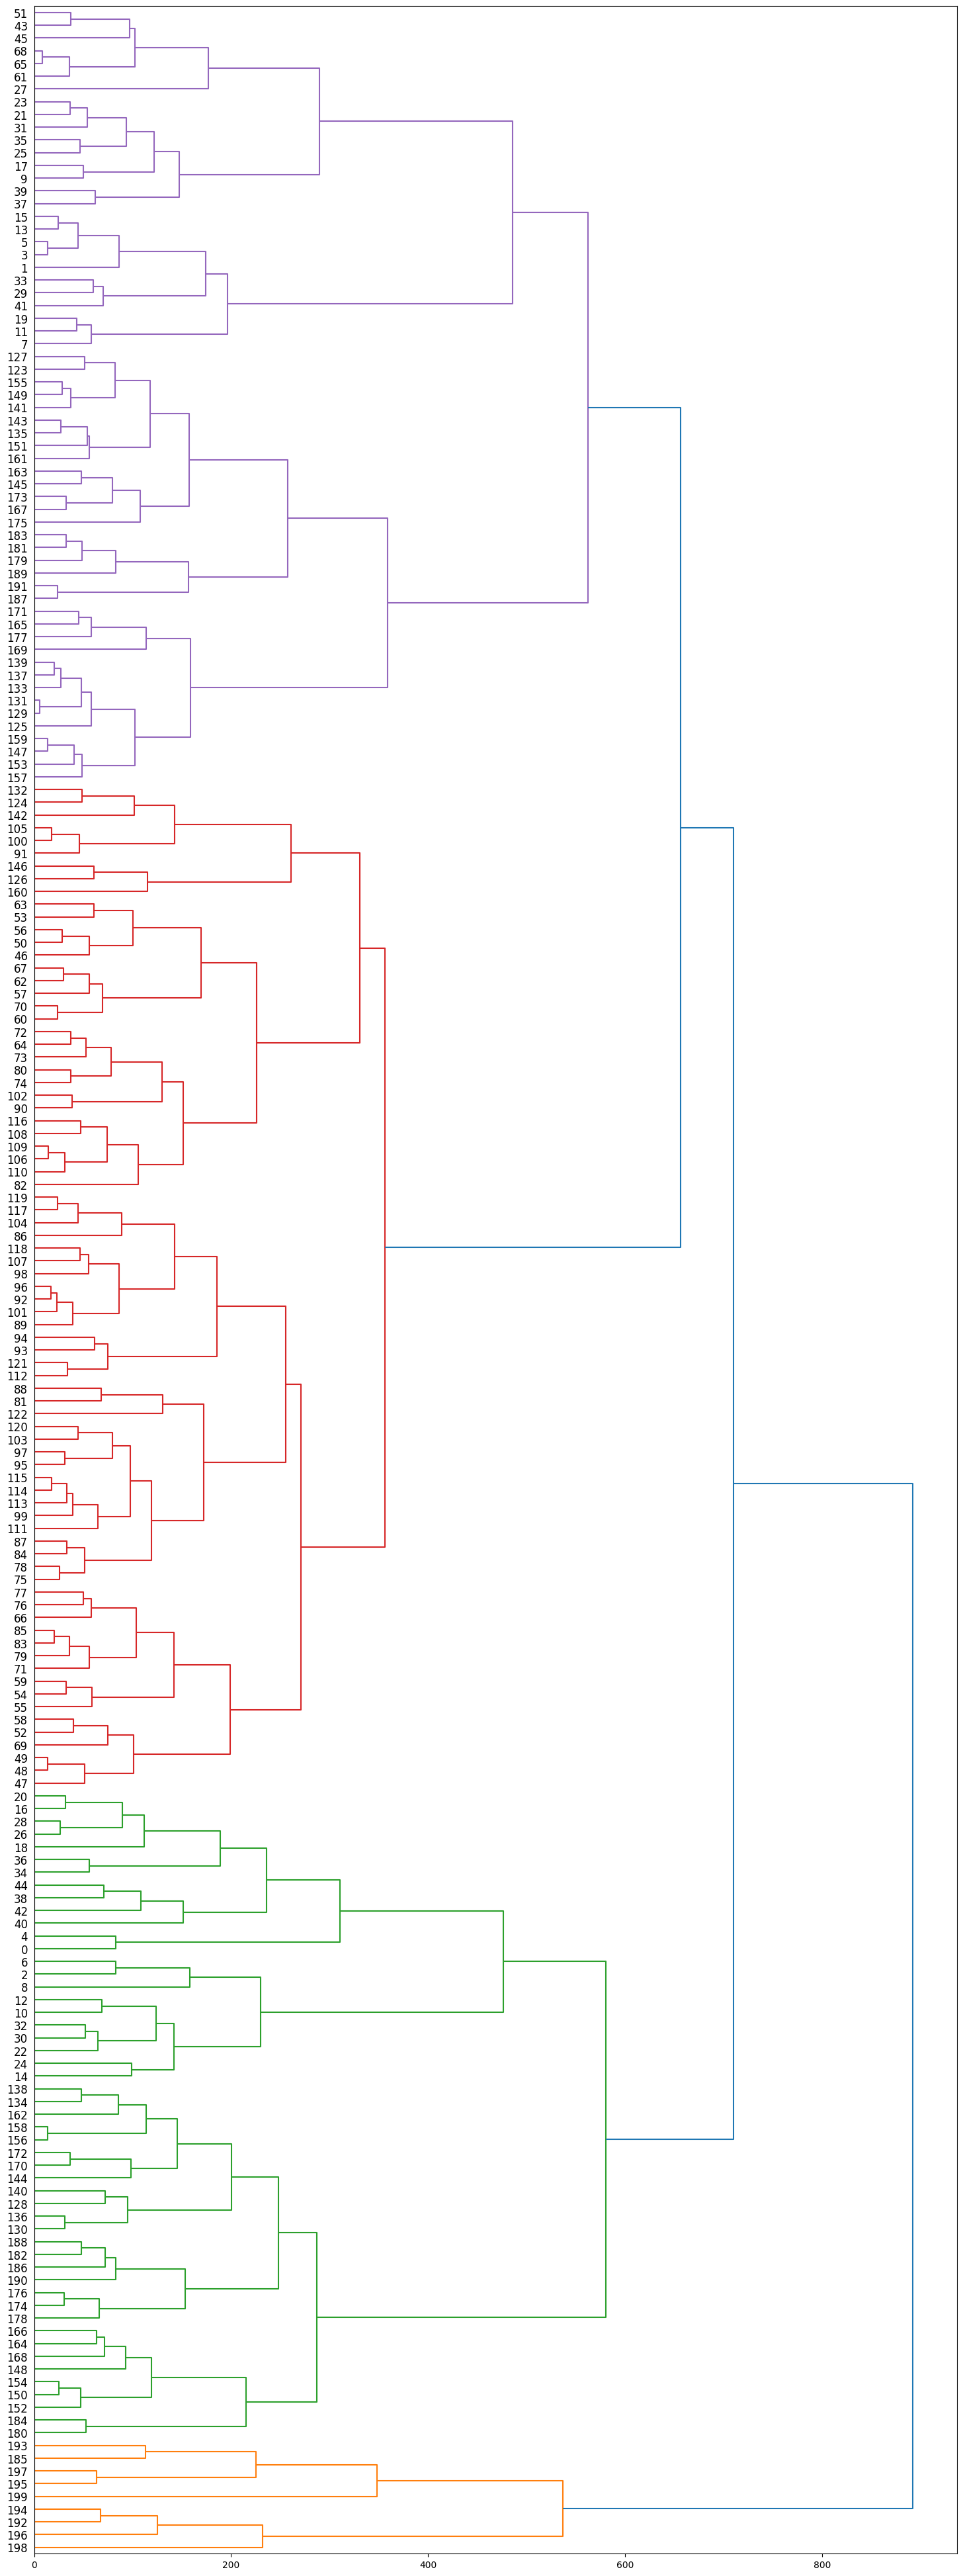

In [24]:
#최대거리 기준 계층 군집 덴드로그램 시각화
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

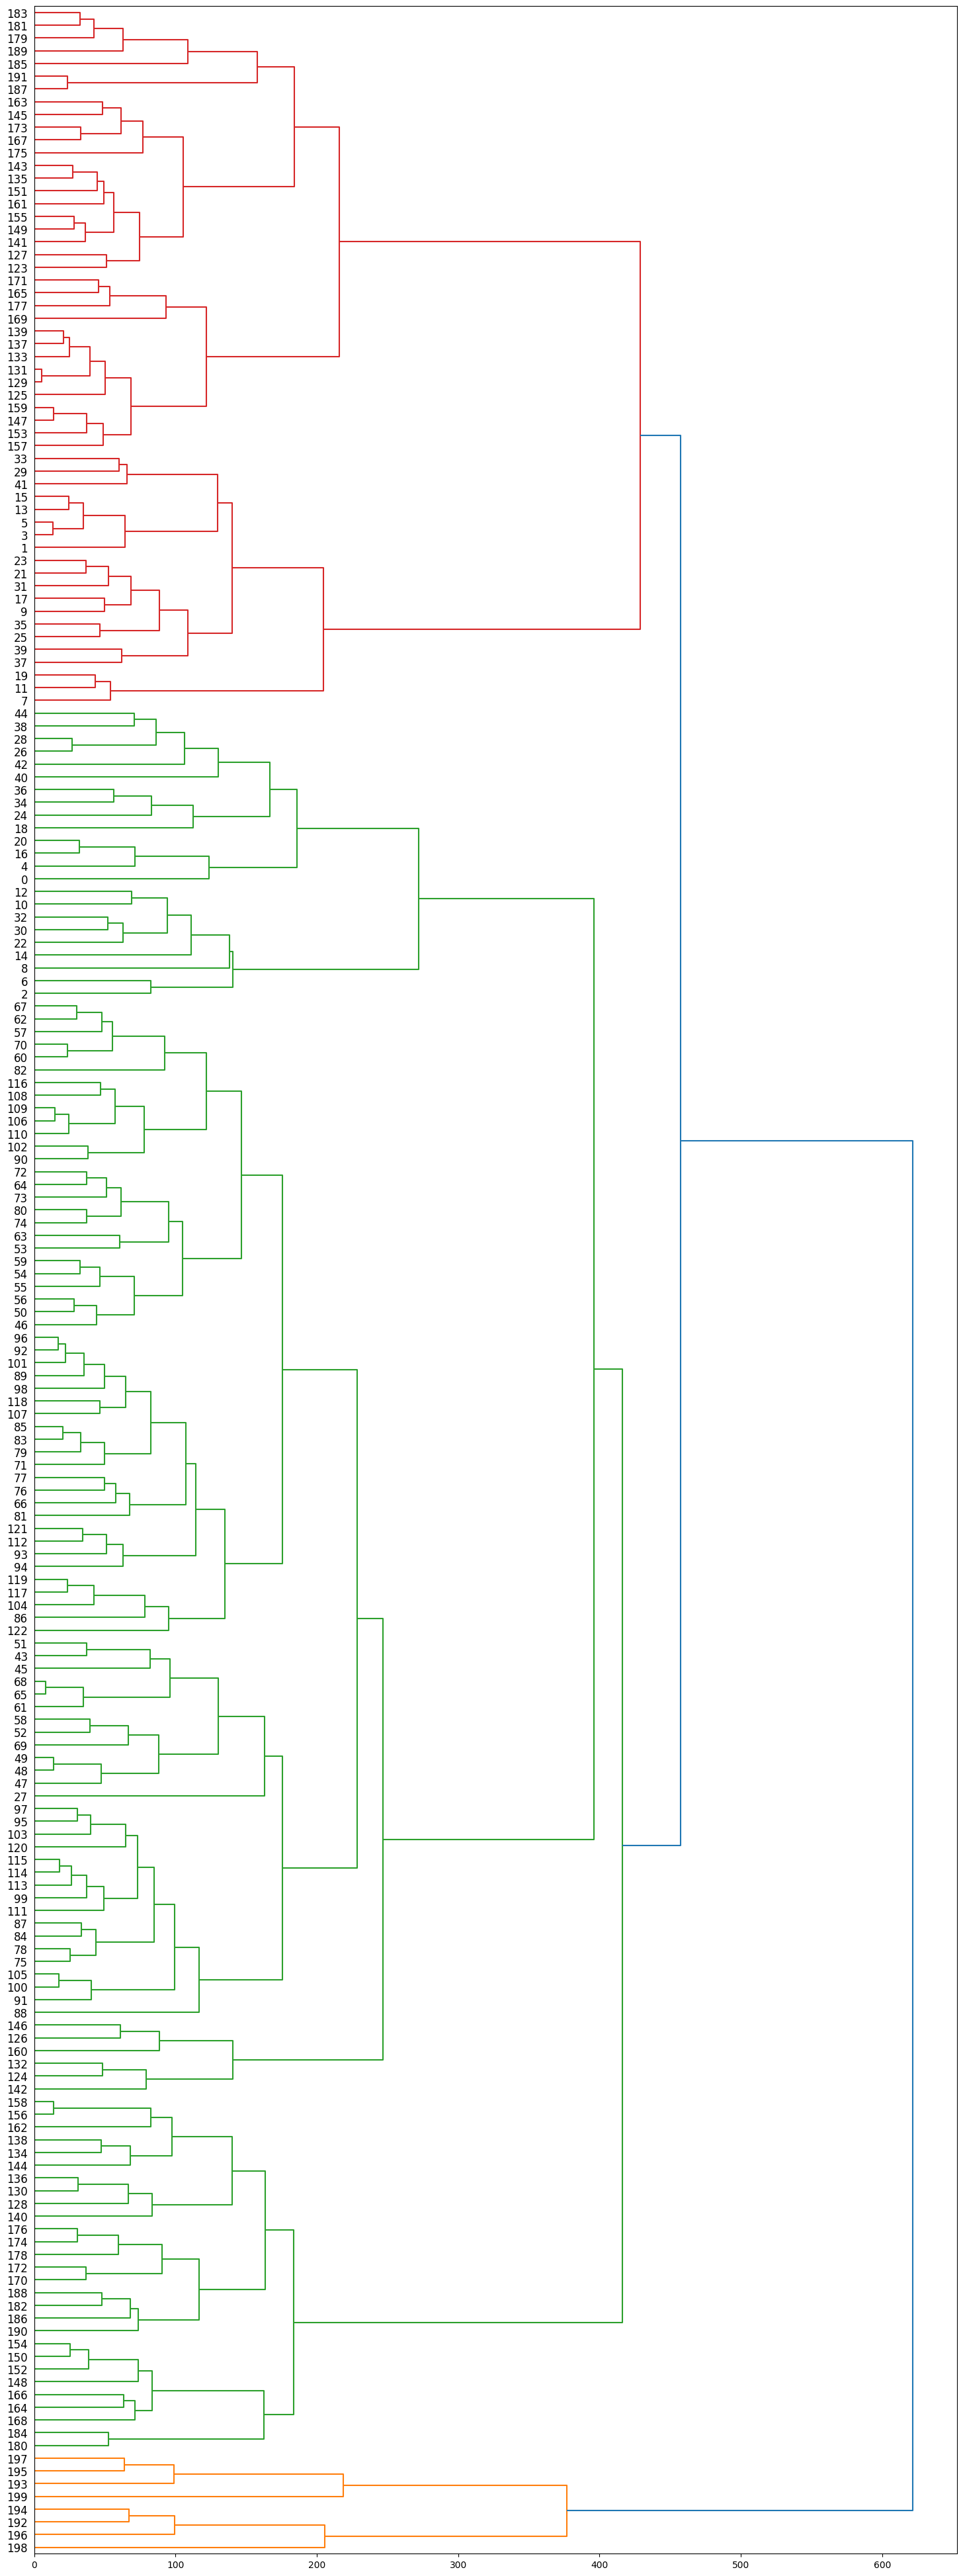

In [25]:
#평균거리 기준 계층적군집 시각화
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## 📌DBSCAN

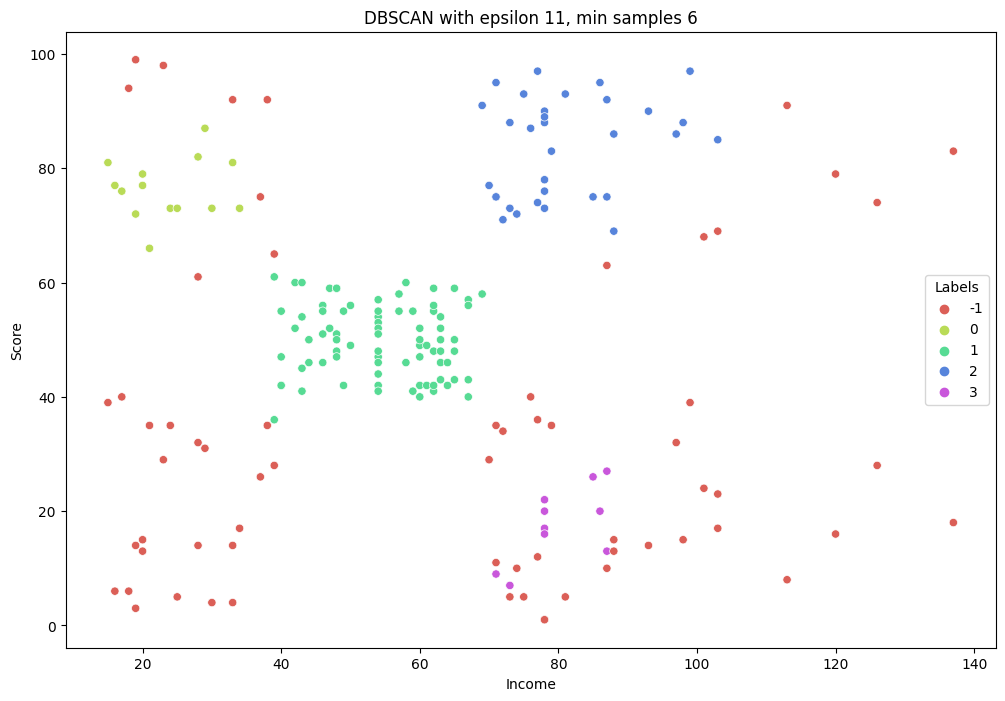

In [26]:
from sklearn.cluster import DBSCAN
#eps 11, minsample 6으로 설정하고 DBSCAN
db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

## 📌Meanshift

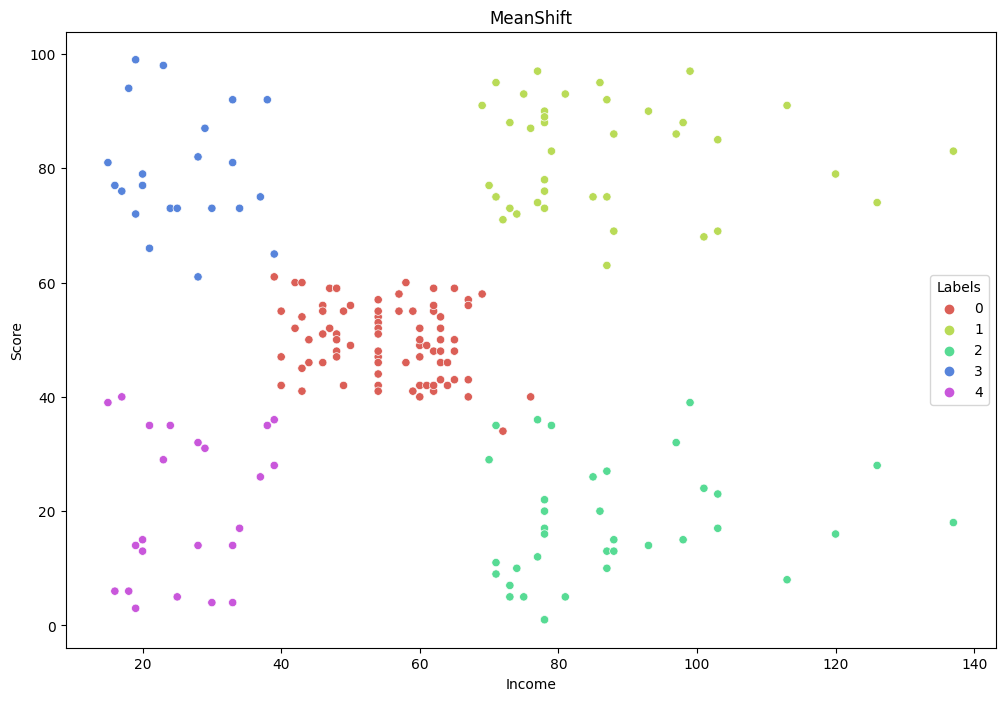

In [30]:
from sklearn.cluster import MeanShift, estimate_bandwidth
#meanshift로 군집화
#The following bandwidth can be automatically detected using
#bandwidth 추정해서 사용!
bandwidth = estimate_bandwidth(X, quantile=0.1)
#여기도 그냥 bandwidth만 적으면 에러가 나길래 파라미터 지정해줬습니다!
ms = MeanShift(bandwidth = bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

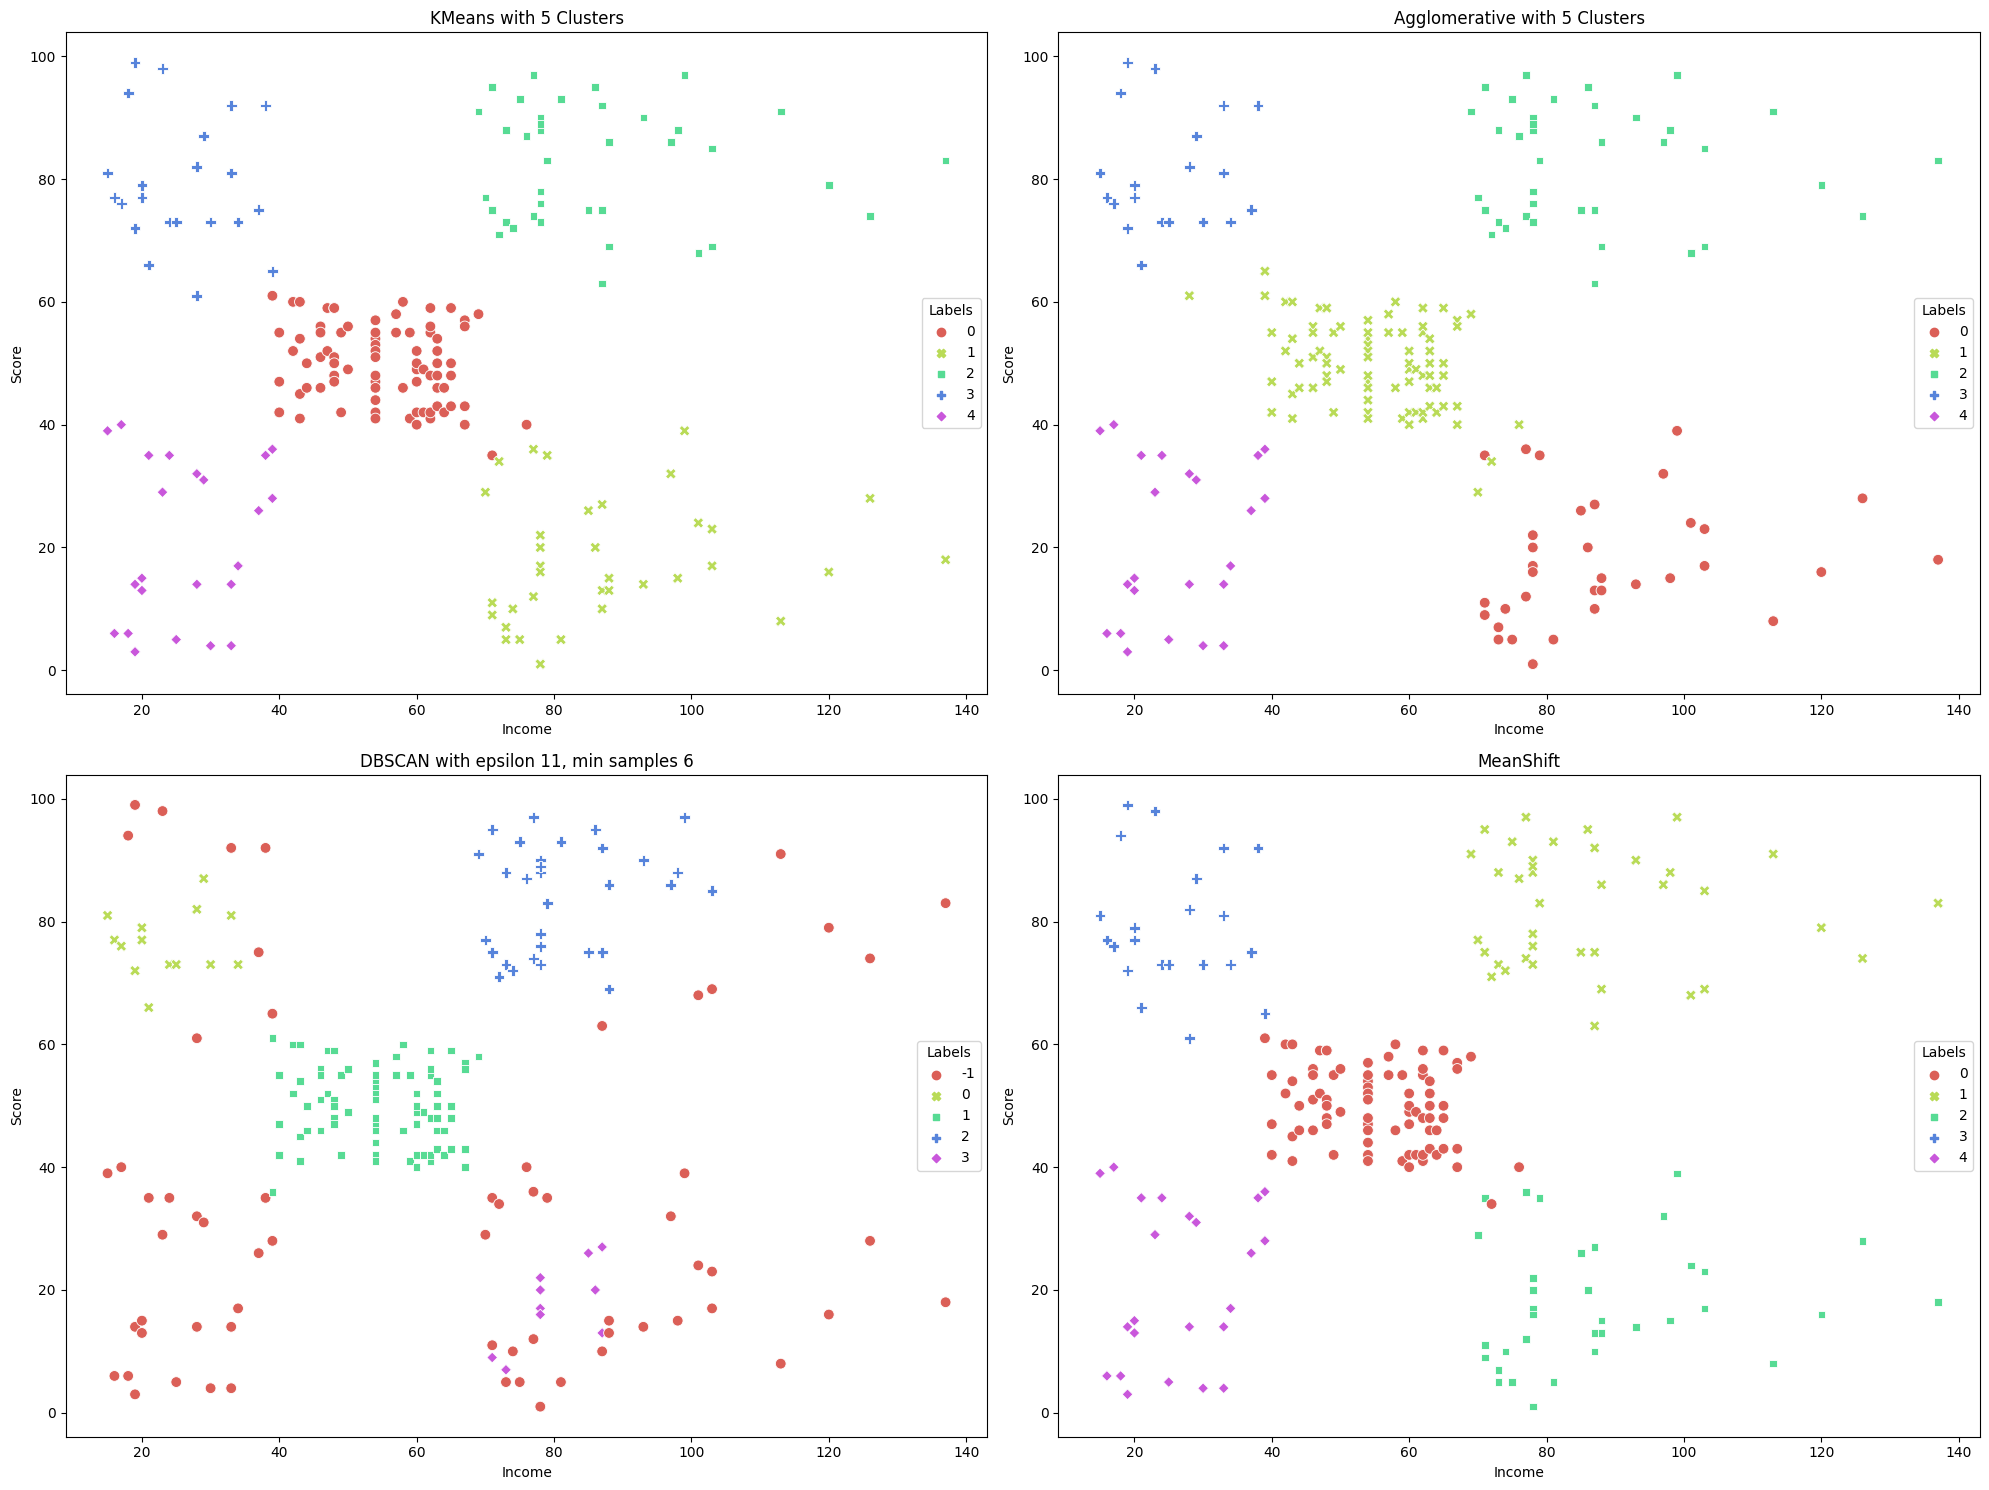

In [32]:
fig = plt.figure(figsize=(20,15))
#총정리 플랏
##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], style=X['Labels'], palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], style=X['Labels'], palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], style=X['Labels'], s=60, palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth = bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], style=X['Labels'], s=60, palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()